Librerias

In [174]:
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import re
from matplotlib import pyplot as plt

# Configuración warnings
# ==============================================================================\n",
import warnings
warnings.filterwarnings('ignore')

Funciones

In [175]:
def GetIssuesSiteGithub(url,repo,proy,tipo):
    pr = LeerurlIssues(url,repo,proy,tipo)
    df_Final = IssuesToDataFrame(pr)
    return df_Final
###
## Funcion que lee de un proyecto los todos los issues abiertos y cerrados.
## con fines, educaciones y te prueba de concepto.
###
def LeerurlIssues(url,repo,proy,tipo):
    #Rutas Fijas para identificar Issues Abiertos y Cerrados
    urlabiertos = '/issues?q=is%3Aopen+is%3Aissue'
    urlcerrados = '/issues?q=is%3Aissue+is%3Aclosed'
    patronbusqueda = repo+proy+'/'+tipo+'/'

    
    soupopen = leerUrlParametros(url,repo,proy,urlabiertos)
    linksopen = soupopen('a')
    
    dfabiertos = ExtraerLinkIssues(url,linksopen,patronbusqueda)
    soupclosed = leerUrlParametros(url,repo,proy,urlcerrados)
    linksclosed = soupclosed('a')
    dfcerrados = ExtraerLinkIssues(url,linksclosed,patronbusqueda)
    
    df = pd.concat([dfabiertos, dfcerrados], axis=0)
    return df  

def ExtraerLinkIssues(url,linkPage,patron):
    lista = []
    for tag in linkPage:
        valor = tag.get('href')
        if(valor.find(patron) != -1):
            
            lista.append(url+ valor)        
    df = pd.DataFrame (lista, columns = ['url_issues'])
    df = df.drop_duplicates()
    return df

def leerUrlParametros(url,repo,proy,tipo):      
    pagina =   url+repo+proy+tipo
    soup = BeautifulSoup(urllib.request.urlopen(pagina).read().decode())
    return  soup

def leerUrl(pagina):    
    soup = BeautifulSoup(urllib.request.urlopen(pagina).read().decode())
    return  soup

def IssuesToDataFrame(lista):
    columns = ["issue", "author", "state", "assignees"]
    df = pd.DataFrame(columns=columns)

    for i in range(len(lista)):
        link = str(lista.iloc[i]['url_issues'])        
        d = ParsearPagina(link)
        df = pd.concat([df, d], axis=0)
    return df


def ParsearPagina (link):
    parts = str(link).split('/')
    issues = parts[len(parts)-1]
    page = leerUrl(link)
    # Con el DataFrame de las paginas de Issues se procede a convertirlo en el DataFrame tarea
    # definición del DataFrame
    columns = ["issue", "author", "state", "assignees"]
    df = pd.DataFrame(columns=columns)
    state = "open"
    page.find_all(content= re.compile(link +"$"))
    if page.find("span", attrs={"title": "Status: Closed"}):
        state = "closed"
    #state
    author = page.find("a", attrs={"class": "author text-bold Link--secondary"}).get_text()
    author
    assignees = (
            page.find("span", attrs={"class": "css-truncate js-issue-assignees"})
            .get_text()
            .replace("\n", "")
            .split()
        )

    if assignees == ["No", "one", "assigned"]:
        assignees = ["Sin_Asignacion"]
    num = len(assignees)
    if num >1:
        for i in range(num):
            #print(assignees[i])
            df = df.append(
                {"issue": issues, "author": author, "state": state, "assignees": assignees[i]},
                ignore_index=True,
            )
    else:
        df = df.append(
            {"issue": issues, "author": author, "state": state, "assignees": assignees[0]},
            ignore_index=True,
            )
    return df
def GraficarEstadisticas(df ,usuariodominio):
    # Contabilizar los Issues Asignados
    issue_count = (df.groupby(['issue', 'author']).size() 
        .sort_values(ascending=False) 
        .reset_index(name='count') 
        .drop_duplicates(subset=['issue', 'author']))
    issue_count.drop('count', axis=1, inplace=True)
    indiceauthor=issue_count[issue_count["author"]=='pescap'].index
    issue_count.drop(indiceauthor,inplace=True)
    AutoresIssues_count = issue_count.author.value_counts()
    AutoresIssues_count
    #issue_count
    assignee_count = df.assignees.value_counts()
    assignee_count =assignee_count.drop(usuariodominio)
    assignee_count =assignee_count.drop("Sin_Asignacion")
    #assignee_count
    concat = pd.concat([AutoresIssues_count, assignee_count])
    concat = concat.clip(upper=7)

    test = pd.DataFrame(columns=["user", "nota"])
    test["user"] = concat.index
    test["nota"] = concat.values

    plt.figure(figsize=(16, 8))
    nota = test.groupby(["user"])["nota"].sum().sort_values() + 1
    nota.plot(kind="barh")
    plt.xlabel("Nota")
    return plt



Cargar Datos de Github 



In [176]:
PaginaRepositorio = '/pescap'
usuariodominio='pescap'
UrlBase = 'https://github.com'
Proyecto = '/WebScrapingMDS'
TipoGitHub = 'issues'
df = GetIssuesSiteGithub(UrlBase,PaginaRepositorio,Proyecto,TipoGitHub)


Desplegar Resultados obtenidos. de Issues Abiertos y Cerrados para el proyecto seleccionado.

In [177]:
df

,issue,author,state,assignees
0,67,enriques76,open,Sin_Asignacion
0,65,jwilenmann,open,Sin_Asignacion
0,64,gavalenz,open,Sin_Asignacion
0,62,jwilenmann,open,Sin_Asignacion
0,60,MiguelAbarzua,open,Sin_Asignacion
0,54,ronaldchester,open,Sin_Asignacion
0,50,Carloslugook,open,Sin_Asignacion
0,48,omaldonados,open,Sin_Asignacion
0,46,pescap,closed,Sin_Asignacion
0,43,DavidValenzuelaP,open,Sin_Asignacion


Grafica de los conceptos issues asignados , cerrados y creados

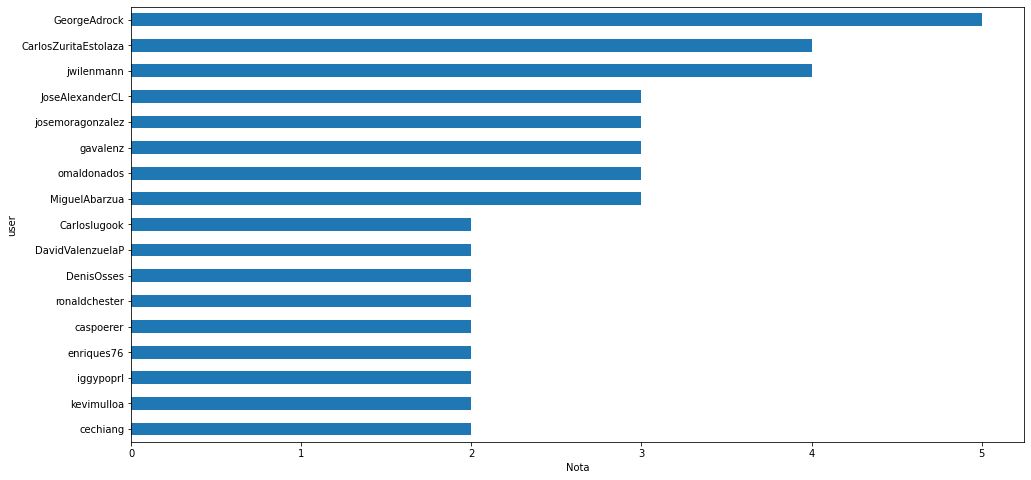

In [178]:
valor = GraficarEstadisticas(df,usuariodominio)
valor.show()